### Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Gas Prices Data

In [10]:
gas = pd.read_csv(r'C:\Users\yarde\Downloads\gas_prices.csv')
gas.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


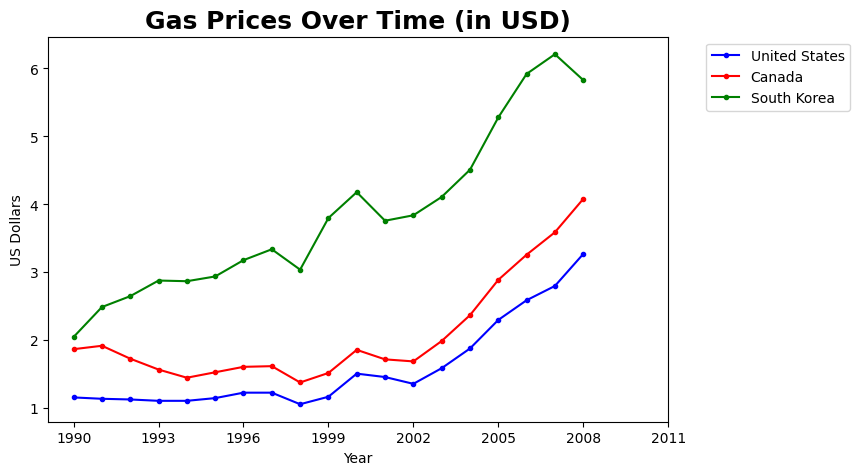

In [45]:
plt.figure(figsize=(8,5))

plt.plot(gas.Year, gas.USA, 'b.-', label='United States')
plt.plot(gas.Year, gas.Canada,'r.-', label='Canada')
plt.plot(gas.Year, gas['South Korea'],'g.-', label='South Korea')

plt.title('Gas Prices Over Time (in USD)', fontdict={'fontweight':'bold','fontsize':18})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(gas.Year[::3].to_list() + [2011])
plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.show()

### Load Fifa Data

In [46]:
fifa = pd.read_csv(r'C:\Users\yarde\Downloads\fifa_data.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histogram

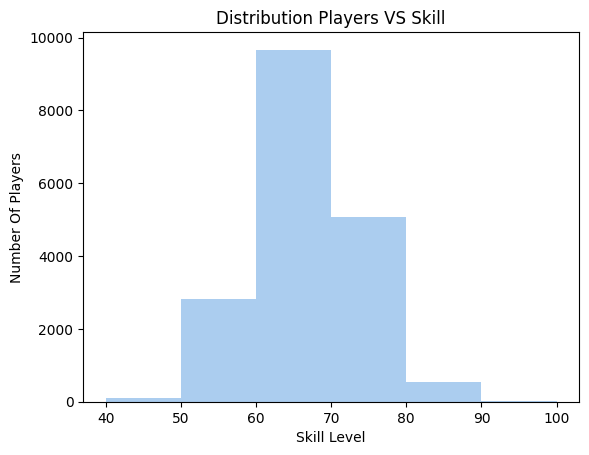

In [58]:
bins = np.arange(40, 110, 10)
plt.hist(fifa.Overall, bins=bins, color='#abcdef')
plt.xticks(bins)

plt.ylabel('Number Of Players')
plt.xlabel('Skill Level')
plt.title('Distribution Players VS Skill')

plt.show()

### Pie Chart

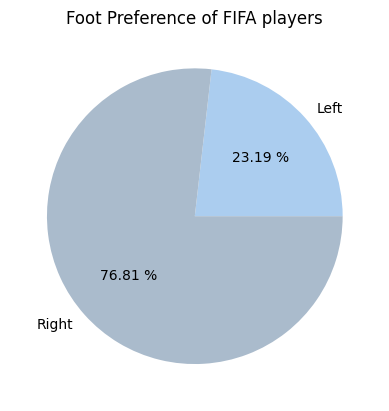

In [82]:
left = fifa[fifa['Preferred Foot'] == 'Left'].shape[0]
right = fifa[fifa['Preferred Foot'] == 'Right'].shape[0]

plt.pie([left, right], labels=['Left','Right'], colors=['#abcdef', '#aabbcc'], autopct='%.2f %%')
plt.title('Foot Preference of FIFA players')
plt.show()

### Second Pie Chart

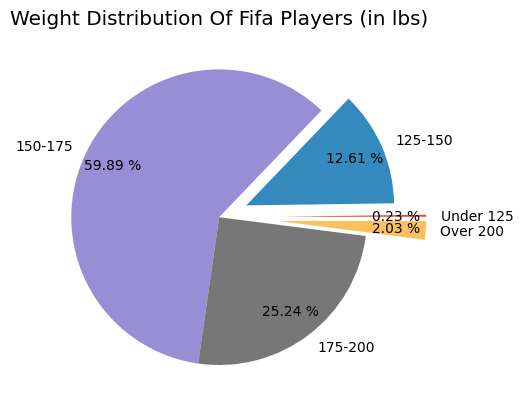

In [116]:
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

plt.style.use('ggplot')

light = fifa[fifa['Weight'] < 125].count().iloc[0]
light_medium = fifa[(fifa['Weight'] >= 125) & (fifa['Weight'] < 150)].count().iloc[0]
medium = fifa[(fifa['Weight'] >= 150) & (fifa['Weight'] < 175)].count().iloc[0]
medium_heavy = fifa[(fifa['Weight'] >= 175) & (fifa['Weight'] < 200)].count().iloc[0]
heavy = fifa[fifa['Weight'] >= 200].count().iloc[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels= ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
explode = (.4,.2,0,0,.4)
plt.pie(weights, labels = labels, autopct='%.2f %%', pctdistance = 0.8, explode=explode)

plt.title('Weight Distribution Of Fifa Players (in lbs)')
plt.show()

### Box Chart

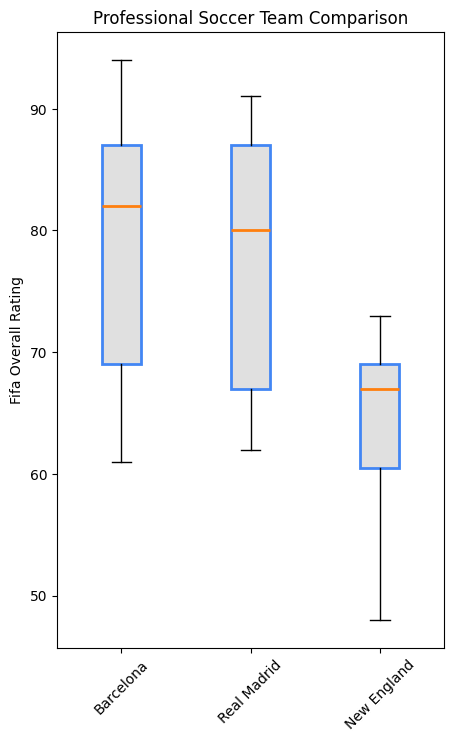

In [135]:
plt.style.use("default")
plt.figure(figsize=(5,8))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']

boxes = plt.boxplot([barcelona, madrid,revs], labels=['Barcelona', 'Real Madrid','New England'], patch_artist = True, medianprops = {'linewidth':2}) #patch_artist for fill afterwards
plt.ylabel('Fifa Overall Rating')
plt.title('Professional Soccer Team Comparison')
plt.xticks(rotation = 45)

for box in boxes['boxes']:
    box.set(color= '#4286f4', linewidth=2)
    #change fill color
    box.set(facecolor = '#e0e0e0')

plt.show()